# STUDYING BRISBANE RIVER WATER QUALITY

---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from PIL import Image as PILImage
from IPython.display import display

import warnings
import time

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

---

### Reading and preprocessing data

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_csv('brisbane_water_quality.csv')
df = df.groupby('Timestamp').mean().reset_index()
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format = '%Y-%m-%d %H:%M:%S')
df.set_index('Timestamp',inplace = True)
df = df.drop(columns = 'Record number')
df = df.loc[:,~df.columns.str.contains('\[quality\]')]
df = df.resample('H').mean().interpolate()
df = df.dropna()
df

Average Water Speed  Average Water Direction  \
Timestamp                                                           
2023-08-04 23:00:00             3.040208               160.230375   
2023-08-05 00:00:00             6.060000                72.561000   
2023-08-05 01:00:00             6.610500               185.775500   
2023-08-05 02:00:00             2.636000               245.397500   
2023-08-05 03:00:00             1.306000               136.297500   
...                                  ...                      ...   
2024-06-27 05:00:00            23.859333               121.049833   
2024-06-27 06:00:00            15.460667               161.216833   
2024-06-27 07:00:00            21.470000               232.498167   
2024-06-27 08:00:00            16.587333               135.813333   
2024-06-27 09:00:00            11.173000               241.662000   

                     Chlorophyll  Temperature  Dissolved Oxygen  \
Timestamp                                                         
2023-08-04 23:00:00     1.821875    19.946208          7.438292   
2023-08-05 00:00:00     1.438000    19.813000          7.452500   
2023-08-05 01:00:00     1.291000    19.755500          7.450500   
2023-08-05 02:00:00     1.218000    19.711500          7.415000   
2023-08-05 03:00:00     1.231500    19.702000          7.201000   
...                          ...          ...               ...   
2024-06-27 05:00:00     2.949500    18.914333          7.122500   
2024-06-27 06:00:00     2.645833    18.823000          6.855667   
2024-06-27 07:00:00     1.630833    18.678833          7.056500   
2024-06-27 08:00:00     1.112667    18.587333          6.856000   
2024-06-27 09:00:00     0.946000    18.562000          5.842000   

                     Dissolved Oxygen (%Saturation)        pH   Salinity  \
Timestamp                                                                  
2023-08-04 23:00:00                      100.594792  8.168500  35.223792   
2023-08-05 00:00:00                      100.569000  8.162500  35.272000   
2023-08-05 01:00:00                      100.443000  8.167500  35.286500   
2023-08-05 02:00:00                       99.891500  8.169500  35.291000   
2023-08-05 03:00:00                       96.990500  8.172000  35.288500   
...                                             ...       ...        ...   
2024-06-27 05:00:00                       91.278667  8.183167  29.374333   
2024-06-27 06:00:00                       87.691667  8.174333  29.344000   
2024-06-27 07:00:00                       89.990000  8.175833  29.306667   
2024-06-27 08:00:00                       87.268500  8.157333  29.266833   
2024-06-27 09:00:00                       74.326000  8.116000  29.258000   

                     Specific Conductance  Turbidity  
Timestamp                                             
2023-08-04 23:00:00             53.273917   2.006917  
2023-08-05 00:00:00             53.338000   2.014000  
2023-08-05 01:00:00             53.357500   1.993500  
2023-08-05 02:00:00             53.364000   1.853000  
2023-08-05 03:00:00             53.360500   2.368500  
...                                   ...        ...  
2024-06-27 05:00:00             45.281167   4.289333  
2024-06-27 06:00:00             45.239333   4.761667  
2024-06-27 07:00:00             45.187667   4.497000  
2024-06-27 08:00:00             45.132667   4.190833  
2024-06-27 09:00:00             45.121000   5.078000  

[7859 rows x 10 columns]

In [5]:
decomposition = seasonal_decompose(df['pH'],
                                   model = 'additive',
                                   period = 24)
trend_pH = decomposition.trend
seasonal_pH = decomposition.seasonal
residual_pH = decomposition.resid

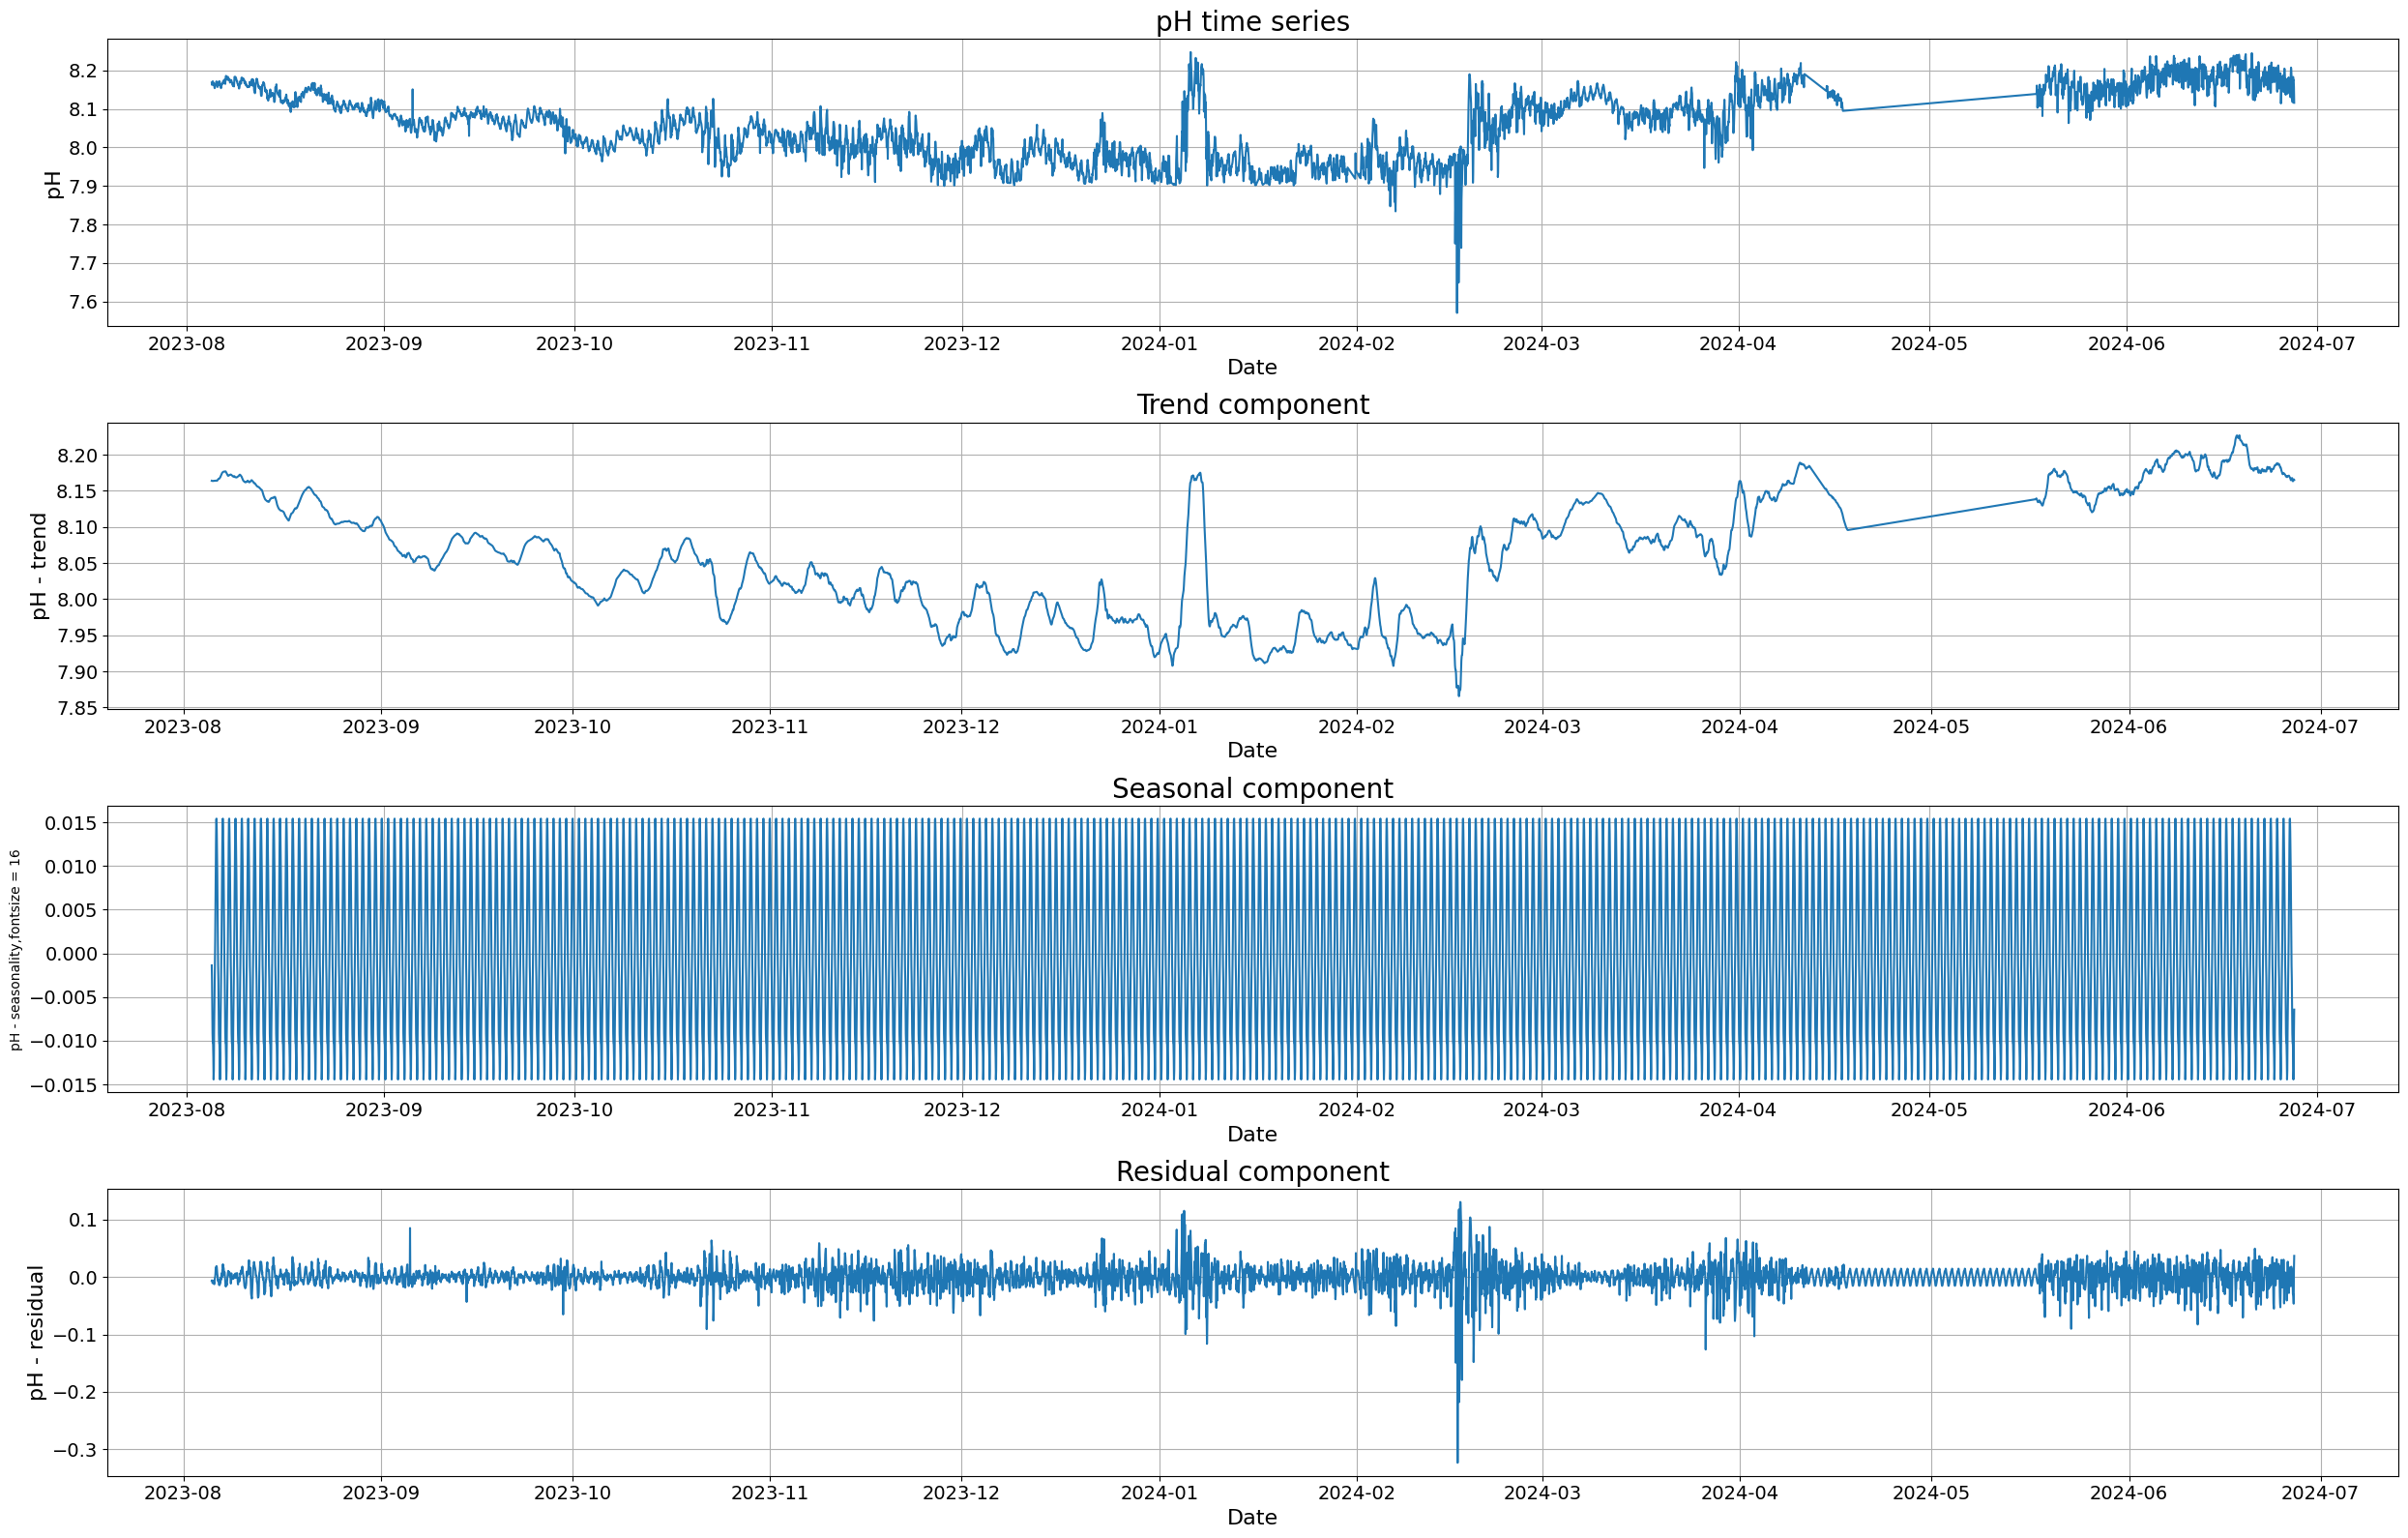

In [6]:
plt.figure(figsize = (25,16))

plt.subplot(411)
plt.plot(df['pH'])
plt.title('pH time series',fontsize = 20)
plt.grid()
plt.xlabel('Date',fontsize = 16)
plt.ylabel('pH',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(412)
plt.plot(trend_pH)
plt.title('Trend component',fontsize = 20)
plt.grid()
plt.xlabel('Date',fontsize = 16)
plt.ylabel('pH - trend',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(413)
plt.plot(seasonal_pH)
plt.title('Seasonal component',fontsize = 20)
plt.grid()
plt.xlabel('Date',fontsize = 16)
plt.ylabel('pH - seasonality,fontsize = 16')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(414)
plt.plot(residual_pH)
plt.title('Residual component',fontsize = 20)
plt.grid()
plt.xlabel('Date',fontsize = 16)
plt.ylabel('pH - residual',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.tight_layout()
plt.show()

This dataset has a lot of noise, so it will be a good idea to design a filter:

In [7]:
window_size = 120
df_filtered = df.rolling(window = window_size).mean()
df_filtered = df_filtered.dropna()
df_filtered

Average Water Speed  Average Water Direction  \
Timestamp                                                           
2023-08-09 22:00:00             4.565189               178.565441   
2023-08-09 23:00:00             4.559325               179.624379   
2023-08-10 00:00:00             4.540125               180.590988   
2023-08-10 01:00:00             4.513888               180.809492   
2023-08-10 02:00:00             4.509987               180.673708   
...                                  ...                      ...   
2024-06-27 05:00:00            17.613943               187.091219   
2024-06-27 06:00:00            17.629449               186.666065   
2024-06-27 07:00:00            17.707722               186.471946   
2024-06-27 08:00:00            17.782036               185.925285   
2024-06-27 09:00:00            17.811076               186.212300   

                     Chlorophyll  Temperature  Dissolved Oxygen  \
Timestamp                                                         
2023-08-09 22:00:00     2.304345    19.462489          7.575007   
2023-08-09 23:00:00     2.317746    19.456717          7.574587   
2023-08-10 00:00:00     2.339637    19.451667          7.572821   
2023-08-10 01:00:00     2.357712    19.447133          7.571217   
2023-08-10 02:00:00     2.372650    19.442867          7.565271   
...                          ...          ...               ...   
2024-06-27 05:00:00     1.793364    17.646457          7.220442   
2024-06-27 06:00:00     1.807647    17.658882          7.221071   
2024-06-27 07:00:00     1.812244    17.670719          7.221803   
2024-06-27 08:00:00     1.813522    17.682329          7.222319   
2024-06-27 09:00:00     1.812767    17.693608          7.214022   

                     Dissolved Oxygen (%Saturation)        pH   Salinity  \
Timestamp                                                                  
2023-08-09 22:00:00                      101.210419  8.169525  34.676236   
2023-08-09 23:00:00                      101.192625  8.169579  34.673517   
2023-08-10 00:00:00                      101.157946  8.169679  34.670292   
2023-08-10 01:00:00                      101.126308  8.169750  34.667025   
2023-08-10 02:00:00                      101.037379  8.169750  34.663796   
...                                             ...       ...        ...   
2024-06-27 05:00:00                       90.152286  8.176365  29.397389   
2024-06-27 06:00:00                       90.179890  8.176337  29.395894   
2024-06-27 07:00:00                       90.208156  8.176287  29.394111   
2024-06-27 08:00:00                       90.232601  8.176153  29.391774   
2024-06-27 09:00:00                       90.144358  8.175638  29.389179   

                     Specific Conductance  Turbidity  
Timestamp                                             
2023-08-09 22:00:00             52.533678   1.905487  
2023-08-09 23:00:00             52.529996   1.907413  
2023-08-10 00:00:00             52.525646   1.908354  
2023-08-10 01:00:00             52.521237   1.909225  
2023-08-10 02:00:00             52.516875   1.911771  
...                                   ...        ...  
2024-06-27 05:00:00             45.320169   3.115034  
2024-06-27 06:00:00             45.318047   3.133416  
2024-06-27 07:00:00             45.315518   3.146490  
2024-06-27 08:00:00             45.312217   3.159841  
2024-06-27 09:00:00             45.308568   3.180145  

[7740 rows x 10 columns]

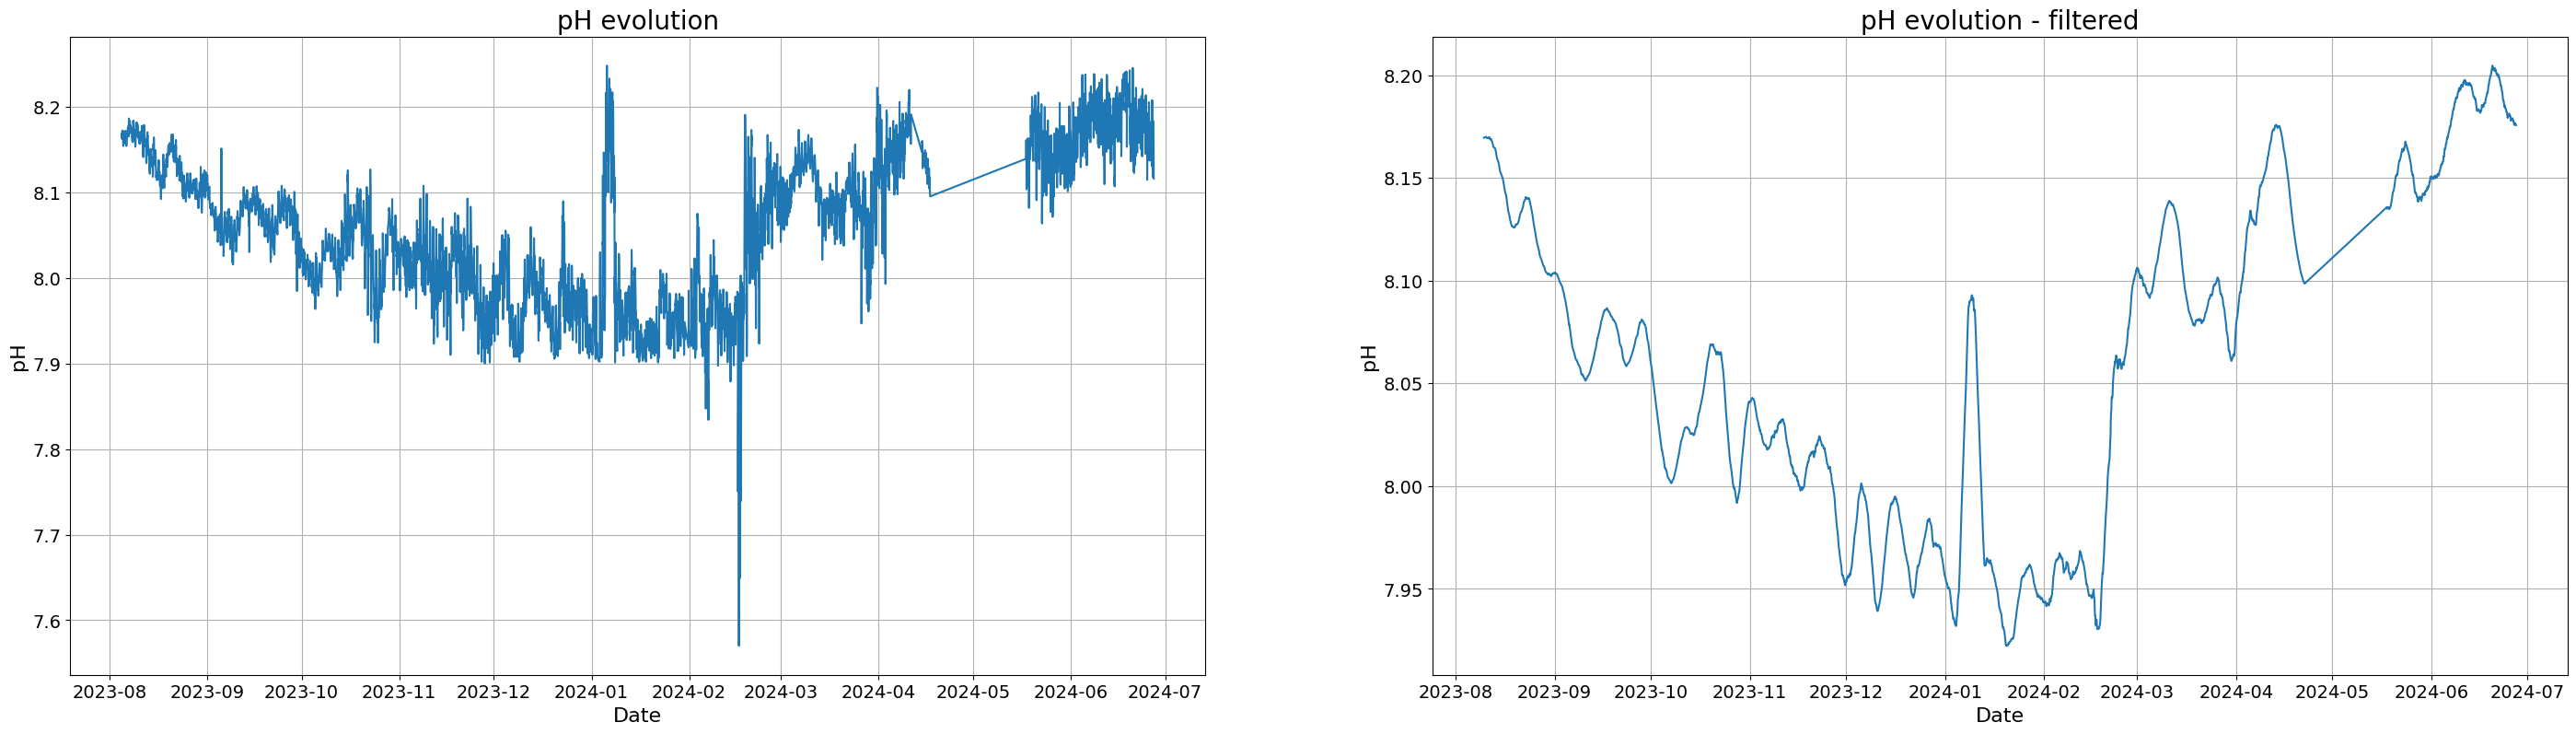

In [8]:
plt.figure(figsize = (35,9))

plt.subplot(121)
plt.plot(df.index,df['pH'])
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('pH',fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('pH evolution',fontsize = 20)
plt.grid()

plt.subplot(122)
plt.plot(df_filtered.index,df_filtered['pH'])
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('pH',fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('pH evolution - filtered',fontsize = 20)
plt.grid()

plt.show()

In [9]:
decomposition = seasonal_decompose(df_filtered['pH'],
                                   model = 'additive',
                                   period = 24)
trend_pH = decomposition.trend
seasonal_pH = decomposition.seasonal
residual_pH = decomposition.resid

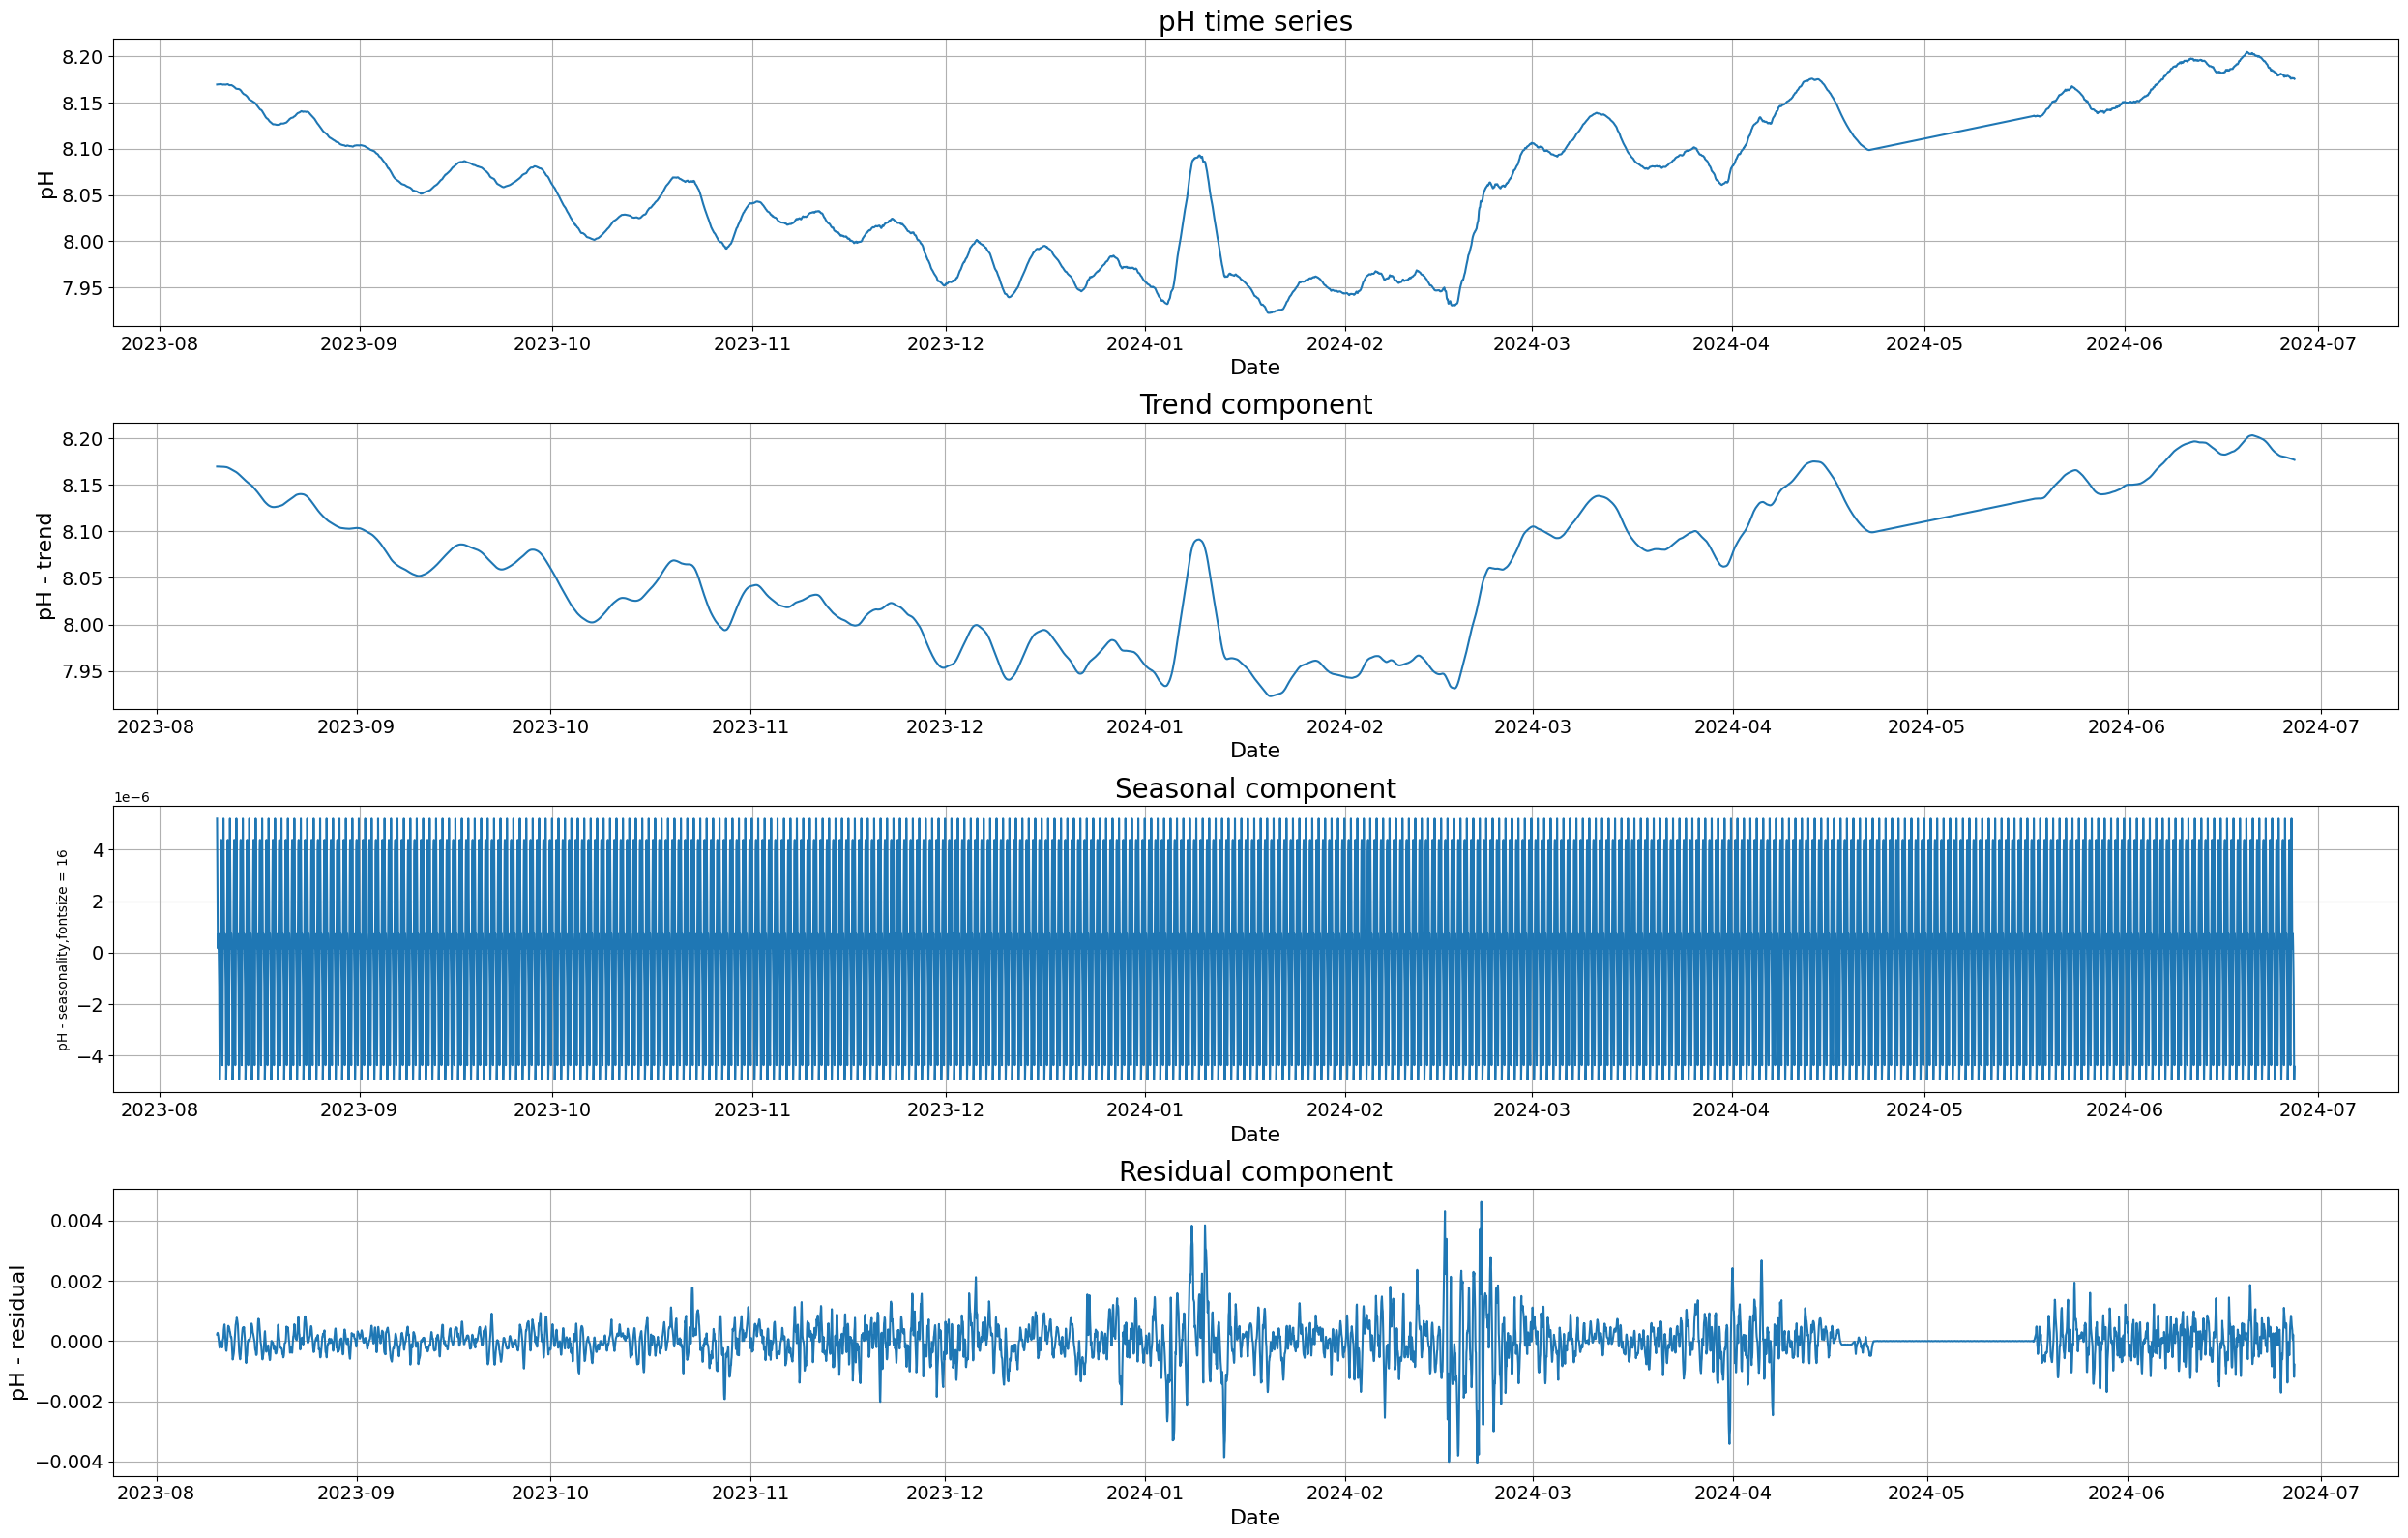

In [10]:
plt.figure(figsize = (25,16))

plt.subplot(411)
plt.plot(df_filtered['pH'])
plt.title('pH time series',fontsize = 20)
plt.grid()
plt.xlabel('Date',fontsize = 16)
plt.ylabel('pH',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(412)
plt.plot(trend_pH)
plt.title('Trend component',fontsize = 20)
plt.grid()
plt.xlabel('Date',fontsize = 16)
plt.ylabel('pH - trend',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(413)
plt.plot(seasonal_pH)
plt.title('Seasonal component',fontsize = 20)
plt.grid()
plt.xlabel('Date',fontsize = 16)
plt.ylabel('pH - seasonality,fontsize = 16')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(414)
plt.plot(residual_pH)
plt.title('Residual component',fontsize = 20)
plt.grid()
plt.xlabel('Date',fontsize = 16)
plt.ylabel('pH - residual',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.tight_layout()
plt.show()

Residual component has been reduced, so the filter has worked properly. This will be the dataset used for the next parts of the study. Now, let's see the rest of the columns:

In [11]:
num_col_plt = [element for element in df_filtered.columns if element not in ["Timestamp","Record number"]]

c = 3  
r = (len(num_col_plt)+c-1)//c 
fig = sp.make_subplots(rows = r,cols = c,
                       subplot_titles = num_col_plt)
fig.update_layout(width = 1500,height = 300*r)

for i,col in enumerate(num_col_plt):
    f = px.line(x = df_filtered.index,y = df_filtered[col])
    row = i//c+1 
    col_pos = i%c+1  
    fig.add_trace(f.data[0],
                  row = row,col = col_pos)
fig.show()

Are these magnitudes correlated?

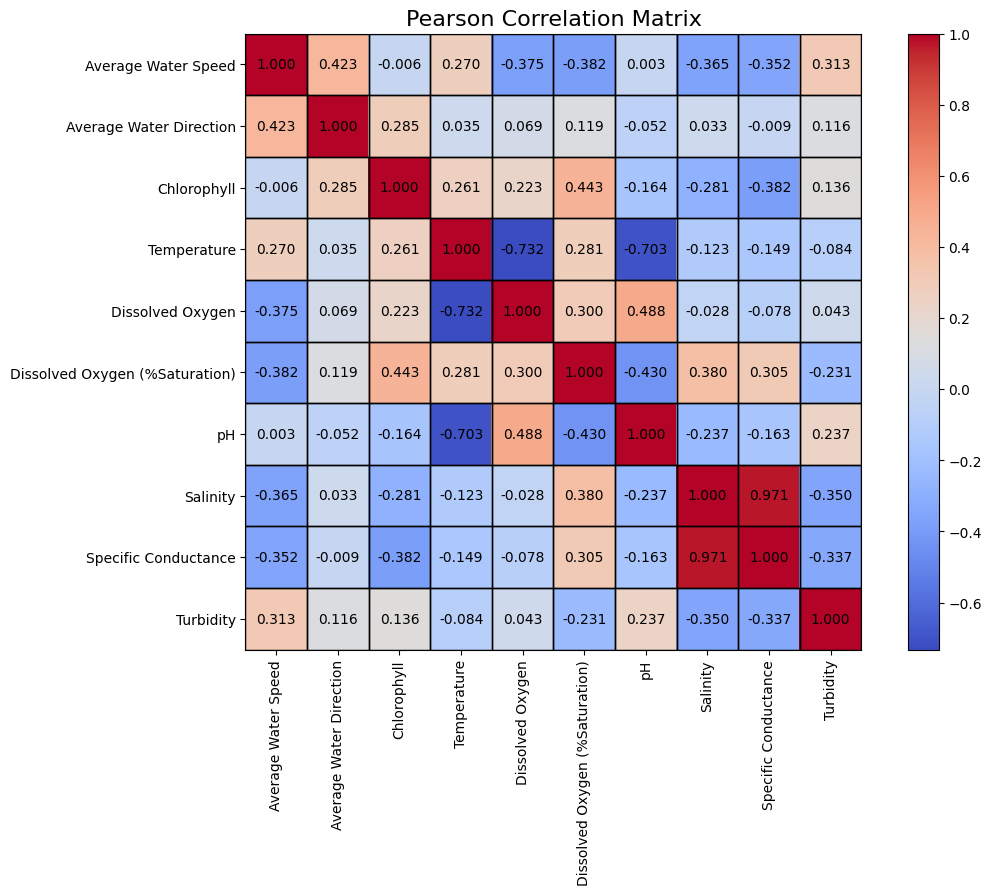

In [12]:
names = df_filtered.columns.to_list()
correlation_matrix = df_filtered[names].corr(method = 'pearson')
correlation_matrix = correlation_matrix.round(3)

fig,ax = plt.subplots(figsize = (12,8))
cax = ax.matshow(correlation_matrix,cmap = 'coolwarm')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_position('bottom')
ax.set_xticklabels(names,rotation = 90)
ax.set_yticklabels(names)
for i in range(len(names)):
    for j in range(len(names)):
        plt.text(j,i,f"{correlation_matrix.iloc[i,j]:.3f}",ha = 'center',va = 'center',color = 'black')
        rect = plt.Rectangle([j-0.5,i-0.5],1,1,fill = False,edgecolor = 'black',linewidth = 1)
        ax.add_patch(rect)
plt.title('Pearson Correlation Matrix',fontsize = 16)
plt.show()

---

### How is pH affected by the other variables?

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error

In [14]:
scorers = {'MSE': make_scorer(mean_squared_error,greater_is_better = False),
           'MAE': make_scorer(mean_absolute_error,greater_is_better = False),
           'R2': make_scorer(r2_score)}

In [15]:
water_features = df_filtered.drop(['pH'],axis = 1)
target = df_filtered[['pH']]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(water_features,
                                                 target,
                                                 test_size = 0.3,
                                                 random_state = 7,
                                                 shuffle = True) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5418, 9), (2322, 9), (5418, 1), (2322, 1))

---

#### Decision Tree model

In [17]:
start_time = time.time()
model_dt = DecisionTreeRegressor(max_depth = 14,
                                 min_samples_leaf = 3,
                                 min_samples_split = 2,
                                 ccp_alpha = 0,
                                 random_state = 7)
model_dt.fit(X_train,y_train)
prediction_dt = model_dt.predict(X_test)
prediction_train_dt = model_dt.predict(X_train)
end_time = time.time()
dt_time = end_time-start_time

mse_dt_train = mean_squared_error(y_train,prediction_train_dt)
mae_dt_train = mean_absolute_error(y_train,prediction_train_dt)
r2_dt_train = r2_score(y_train,prediction_train_dt)

best_mse_dt = mean_squared_error(y_test,prediction_dt)
best_mae_dt = mean_absolute_error(y_test,prediction_dt)
best_r2_dt = r2_score(y_test,prediction_dt)

print('-----------------------------------------------------------------------------------------------------------------------')
print('TRAIN DATASET')
print(f'MSE: {mse_dt_train:.4f} - MAE: {mae_dt_train:.4f} - R2: {r2_dt_train:.4f}')
print('TEST DATASET')
print(f"MSE: {best_mse_dt:.4f} - MAE: {best_mae_dt:.4f} - R2: {best_r2_dt:.4f} - Elapsed time: {dt_time:.4f} s")

-----------------------------------------------------------------------------------------------------------------------
TRAIN DATASET
MSE: 0.0000 - MAE: 0.0006 - R2: 0.9995
TEST DATASET
MSE: 0.0000 - MAE: 0.0011 - R2: 0.9978 - Elapsed time: 0.0491 s


In [18]:
importances_dt = model_dt.feature_importances_
indexes_dt = np.argsort(importances_dt)[::-1]
names_dt = [X_train.columns[i] for i in indexes_dt] 

---

### Extra Trees model

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

In [20]:
start_time = time.time()
model_et = ExtraTreesRegressor(max_depth = 18,
                               min_samples_leaf = 1,
                               min_samples_split = 3,
                               ccp_alpha = 0,
                               n_estimators = 59,
                               random_state = 7)
model_et.fit(X_train,y_train)
prediction_et = model_et.predict(X_test)
prediction_train_et = model_et.predict(X_train)
end_time = time.time()
et_time = end_time-start_time

mse_et_train = mean_squared_error(y_train,prediction_train_et)
mae_et_train = mean_absolute_error(y_train,prediction_train_et)
r2_et_train = r2_score(y_train,prediction_train_et)

best_mse_et = mean_squared_error(y_test,prediction_et)
best_mae_et = mean_absolute_error(y_test,prediction_et)
best_r2_et = r2_score(y_test,prediction_et)

print('-----------------------------------------------------------------------------------------------------------------------')
print('TRAIN DATASET')
print(f'MSE: {mse_et_train:.4f} - MAE: {mae_et_train:.4f} - R2: {r2_et_train:.4f}')
print('TEST DATASET')
print(f"MSE: {best_mse_et:.4f} - MAE: {best_mae_et:.4f} - R2: {best_r2_et:.4f} - Elapsed time: {et_time:.4f} s")

-----------------------------------------------------------------------------------------------------------------------
TRAIN DATASET
MSE: 0.0000 - MAE: 0.0001 - R2: 1.0000
TEST DATASET
MSE: 0.0000 - MAE: 0.0003 - R2: 0.9999 - Elapsed time: 0.5600 s


In [21]:
importances_et = model_et.feature_importances_
indexes_et = np.argsort(importances_et)[::-1]
names_et = [X_train.columns[i] for i in indexes_et] 

---

### Random Forest model

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
start_time = time.time()
best_model_rf = RandomForestRegressor(n_estimators = 539,
                                      max_depth = 19,
                                      min_samples_split = 2,
                                      min_samples_leaf = 1,
                                      ccp_alpha = 0,
                                      min_weight_fraction_leaf = 0,
                                      random_state = 7)
best_model_rf.fit(X_train,y_train)
prediction_rf_train = best_model_rf.predict(X_train)
prediction_rf = best_model_rf.predict(X_test)
end_time = time.time()
time_rf = end_time-start_time

mse_rf_train = mean_squared_error(y_train,prediction_rf_train)
mae_rf_train = mean_absolute_error(y_train,prediction_rf_train)
r2_rf_train = r2_score(y_train,prediction_rf_train)

best_mse_rf = mean_squared_error(y_test,prediction_rf)
best_mae_rf = mean_absolute_error(y_test,prediction_rf)
best_r2_rf = r2_score(y_test,prediction_rf)

print('-----------------------------------------------------------------------------------------------------------------------')
print('TRAIN DATASET')
print(f"Best MSE: {mse_rf_train:.4f} - Best MAE: {mae_rf_train:.4f} - Best R2: {r2_rf_train:.4f}")
print('TEST DATASET')
print(f"Best MSE: {best_mse_rf:.4f} - Best MAE: {best_mae_rf:.4f} - Best R2: {best_r2_rf:.4f} - Elapsed time: {time_rf:.4f} s")

-----------------------------------------------------------------------------------------------------------------------
TRAIN DATASET
Best MSE: 0.0000 - Best MAE: 0.0002 - Best R2: 0.9999
TEST DATASET
Best MSE: 0.0000 - Best MAE: 0.0007 - Best R2: 0.9989 - Elapsed time: 16.4968 s


In [25]:
importances_rf = best_model_rf.feature_importances_
indexes_rf = np.argsort(importances_rf)[::-1]
names_rf = [X_train.columns[i] for i in indexes_rf] 

---

### XGBoost model

In [26]:
from xgboost import XGBRegressor

In [27]:
start_time = time.time()
model_xgb = XGBRegressor(eta = 0.15,
                         max_depth = 9,
                         alpha = 0,
                         gamma = 0,
                         n_estimators = 55,
                         random_state = 7)
model_xgb.fit(X_train,y_train)
prediction_xgb_train = model_xgb.predict(X_train)
prediction_xgb = model_xgb.predict(X_test)
end_time = time.time()
time_xgb = end_time-start_time

mse_xgb_train = mean_squared_error(y_train,prediction_xgb_train)
mae_xgb_train = mean_absolute_error(y_train,prediction_xgb_train)
r2_xgb_train = r2_score(y_train,prediction_xgb_train)

best_mse_xgb = mean_squared_error(y_test,prediction_xgb)
best_mae_xgb = mean_absolute_error(y_test,prediction_xgb)
best_r2_xgb = r2_score(y_test,prediction_xgb)

print('-----------------------------------------------------------------------------------------------------------------------')
print('TRAIN DATASET')
print(f"Best MSE: {mse_xgb_train:.4f} - Best MAE: {mae_xgb_train:.4f} - Best R2: {r2_xgb_train:.4f}")
print('TEST DATASET')
print(f"Best MSE: {best_mse_xgb:.4f} - Best MAE: {best_mae_xgb:.4f} - Best R2: {best_r2_xgb:.4f} - Elapsed time: {time_xgb:.4f} s")

-----------------------------------------------------------------------------------------------------------------------
TRAIN DATASET
Best MSE: 0.0000 - Best MAE: 0.0004 - Best R2: 1.0000
TEST DATASET
Best MSE: 0.0000 - Best MAE: 0.0007 - Best R2: 0.9998 - Elapsed time: 0.2918 s


In [28]:
importances_xgb = model_xgb.feature_importances_
indexes_xgb = np.argsort(importances_xgb)[::-1]
names_xgb = [X_train.columns[i] for i in indexes_xgb] 

---

### Models comparison

In [ ]:
metrics_train = pd.DataFrame({'Model': ['Decision Tree','Extra Trees','Random Forest','XGBoost'],
                        'MAE - Train set': [mae_dt_train,mae_et_train,mae_rf_train,mae_xgb_train],
                        
                        'MSE - Train set': [mse_dt_train,mse_et_train,mse_rf_train,mse_xgb_train],
                        'MSE - Test set': [best_mse_dt,best_mse_et,best_mse_rf,best_mse_xgb],
                        'R2 - Train set': [r2_dt_train,r2_et_train,r2_rf_train,r2_xgb_train],
                        'R2 - Test set': [best_r2_dt,best_r2_et,best_r2_rf,best_r2_xgb]})
metrics_train = metrics_train.sort_values

In [ ]:
metrics_test = pd.DataFrame({'Model': ['Decision Tree','Extra Trees','Random Forest','XGBoost'],
                             })

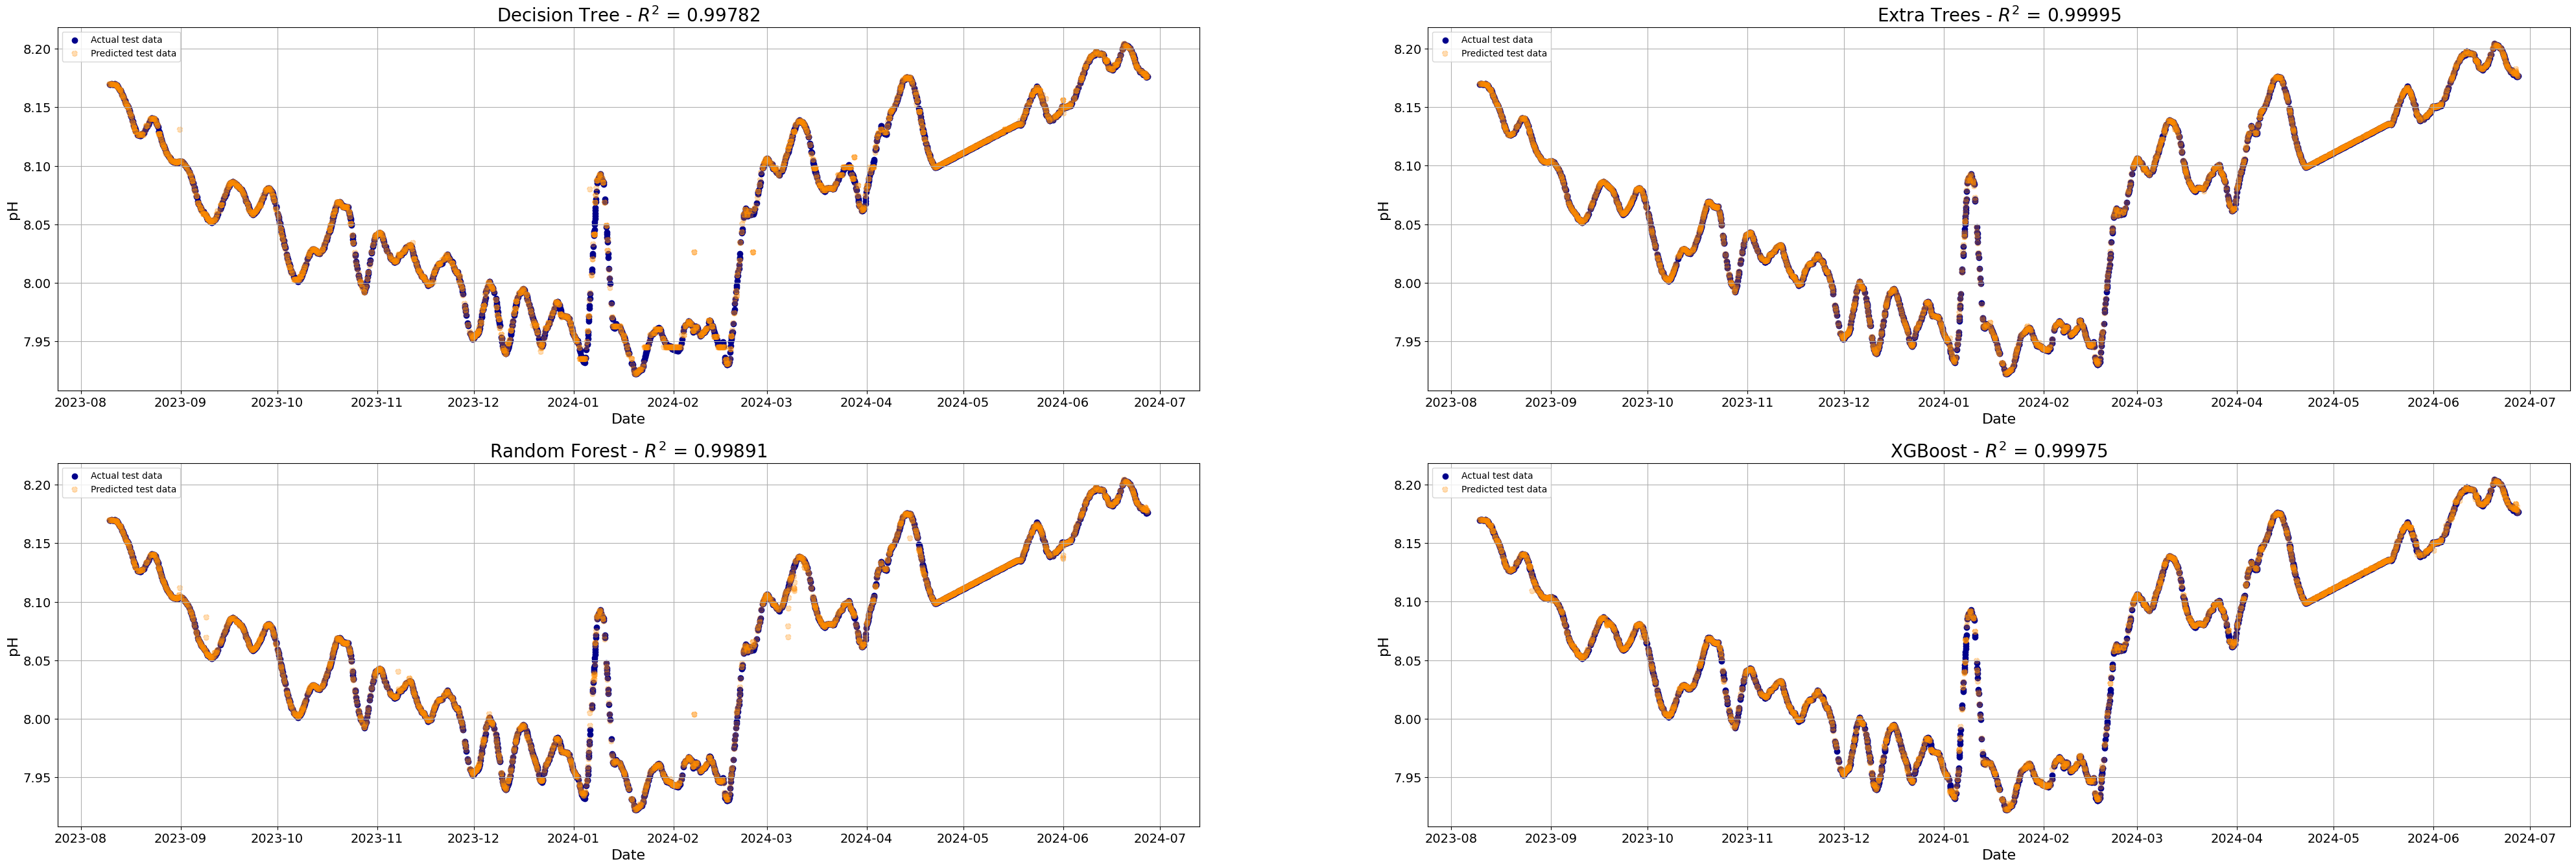

In [29]:
plt.figure(figsize = (50,16))

plt.subplot(221)
plt.scatter(y_test.index,y_test,
            color = 'darkblue',
            label = 'Actual test data')
plt.scatter(y_test.index,prediction_dt,
            color = 'darkorange',
            alpha = 0.3,
            linestyle = '--',
            label = 'Predicted test data')
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('pH',fontsize = 16)
plt.yticks(fontsize = 14)
plt.title(f'Decision Tree - $R^2$ = {best_r2_dt:.5f}',fontsize = 20)
plt.grid()
plt.legend()

plt.subplot(222)
plt.scatter(y_test.index,y_test,
            color = 'darkblue',
            label = 'Actual test data')
plt.scatter(y_test.index,prediction_et,
            color = 'darkorange',
            alpha = 0.3,
            linestyle = '--',
            label = 'Predicted test data')
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('pH',fontsize = 16)
plt.yticks(fontsize = 14)
plt.title(f'Extra Trees - $R^2$ = {best_r2_et:.5f}',fontsize = 20)
plt.legend()
plt.grid()

plt.subplot(223)
plt.scatter(y_test.index,y_test,
            color = 'darkblue',
            label = 'Actual test data')
plt.scatter(y_test.index,prediction_rf,
            color = 'darkorange',
            alpha = 0.3,
            linestyle = '--',
            label = 'Predicted test data')
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('pH',fontsize = 16)
plt.yticks(fontsize = 14)
plt.title(f'Random Forest - $R^2$ = {best_r2_rf:.5f}',fontsize = 20)
plt.legend()
plt.grid()

plt.subplot(224)
plt.scatter(y_test.index,y_test,
            color = 'darkblue',
            label = 'Actual test data')
plt.scatter(y_test.index,prediction_xgb,
            color = 'darkorange',
            alpha = 0.3,
            linestyle = '--',
            label = 'Predicted test data')
plt.xlabel('Date',fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('pH',fontsize = 16)
plt.yticks(fontsize = 14)
plt.title(f'XGBoost - $R^2$ = {best_r2_xgb:.5f}',fontsize = 20)
plt.legend()
plt.grid()

plt.show()

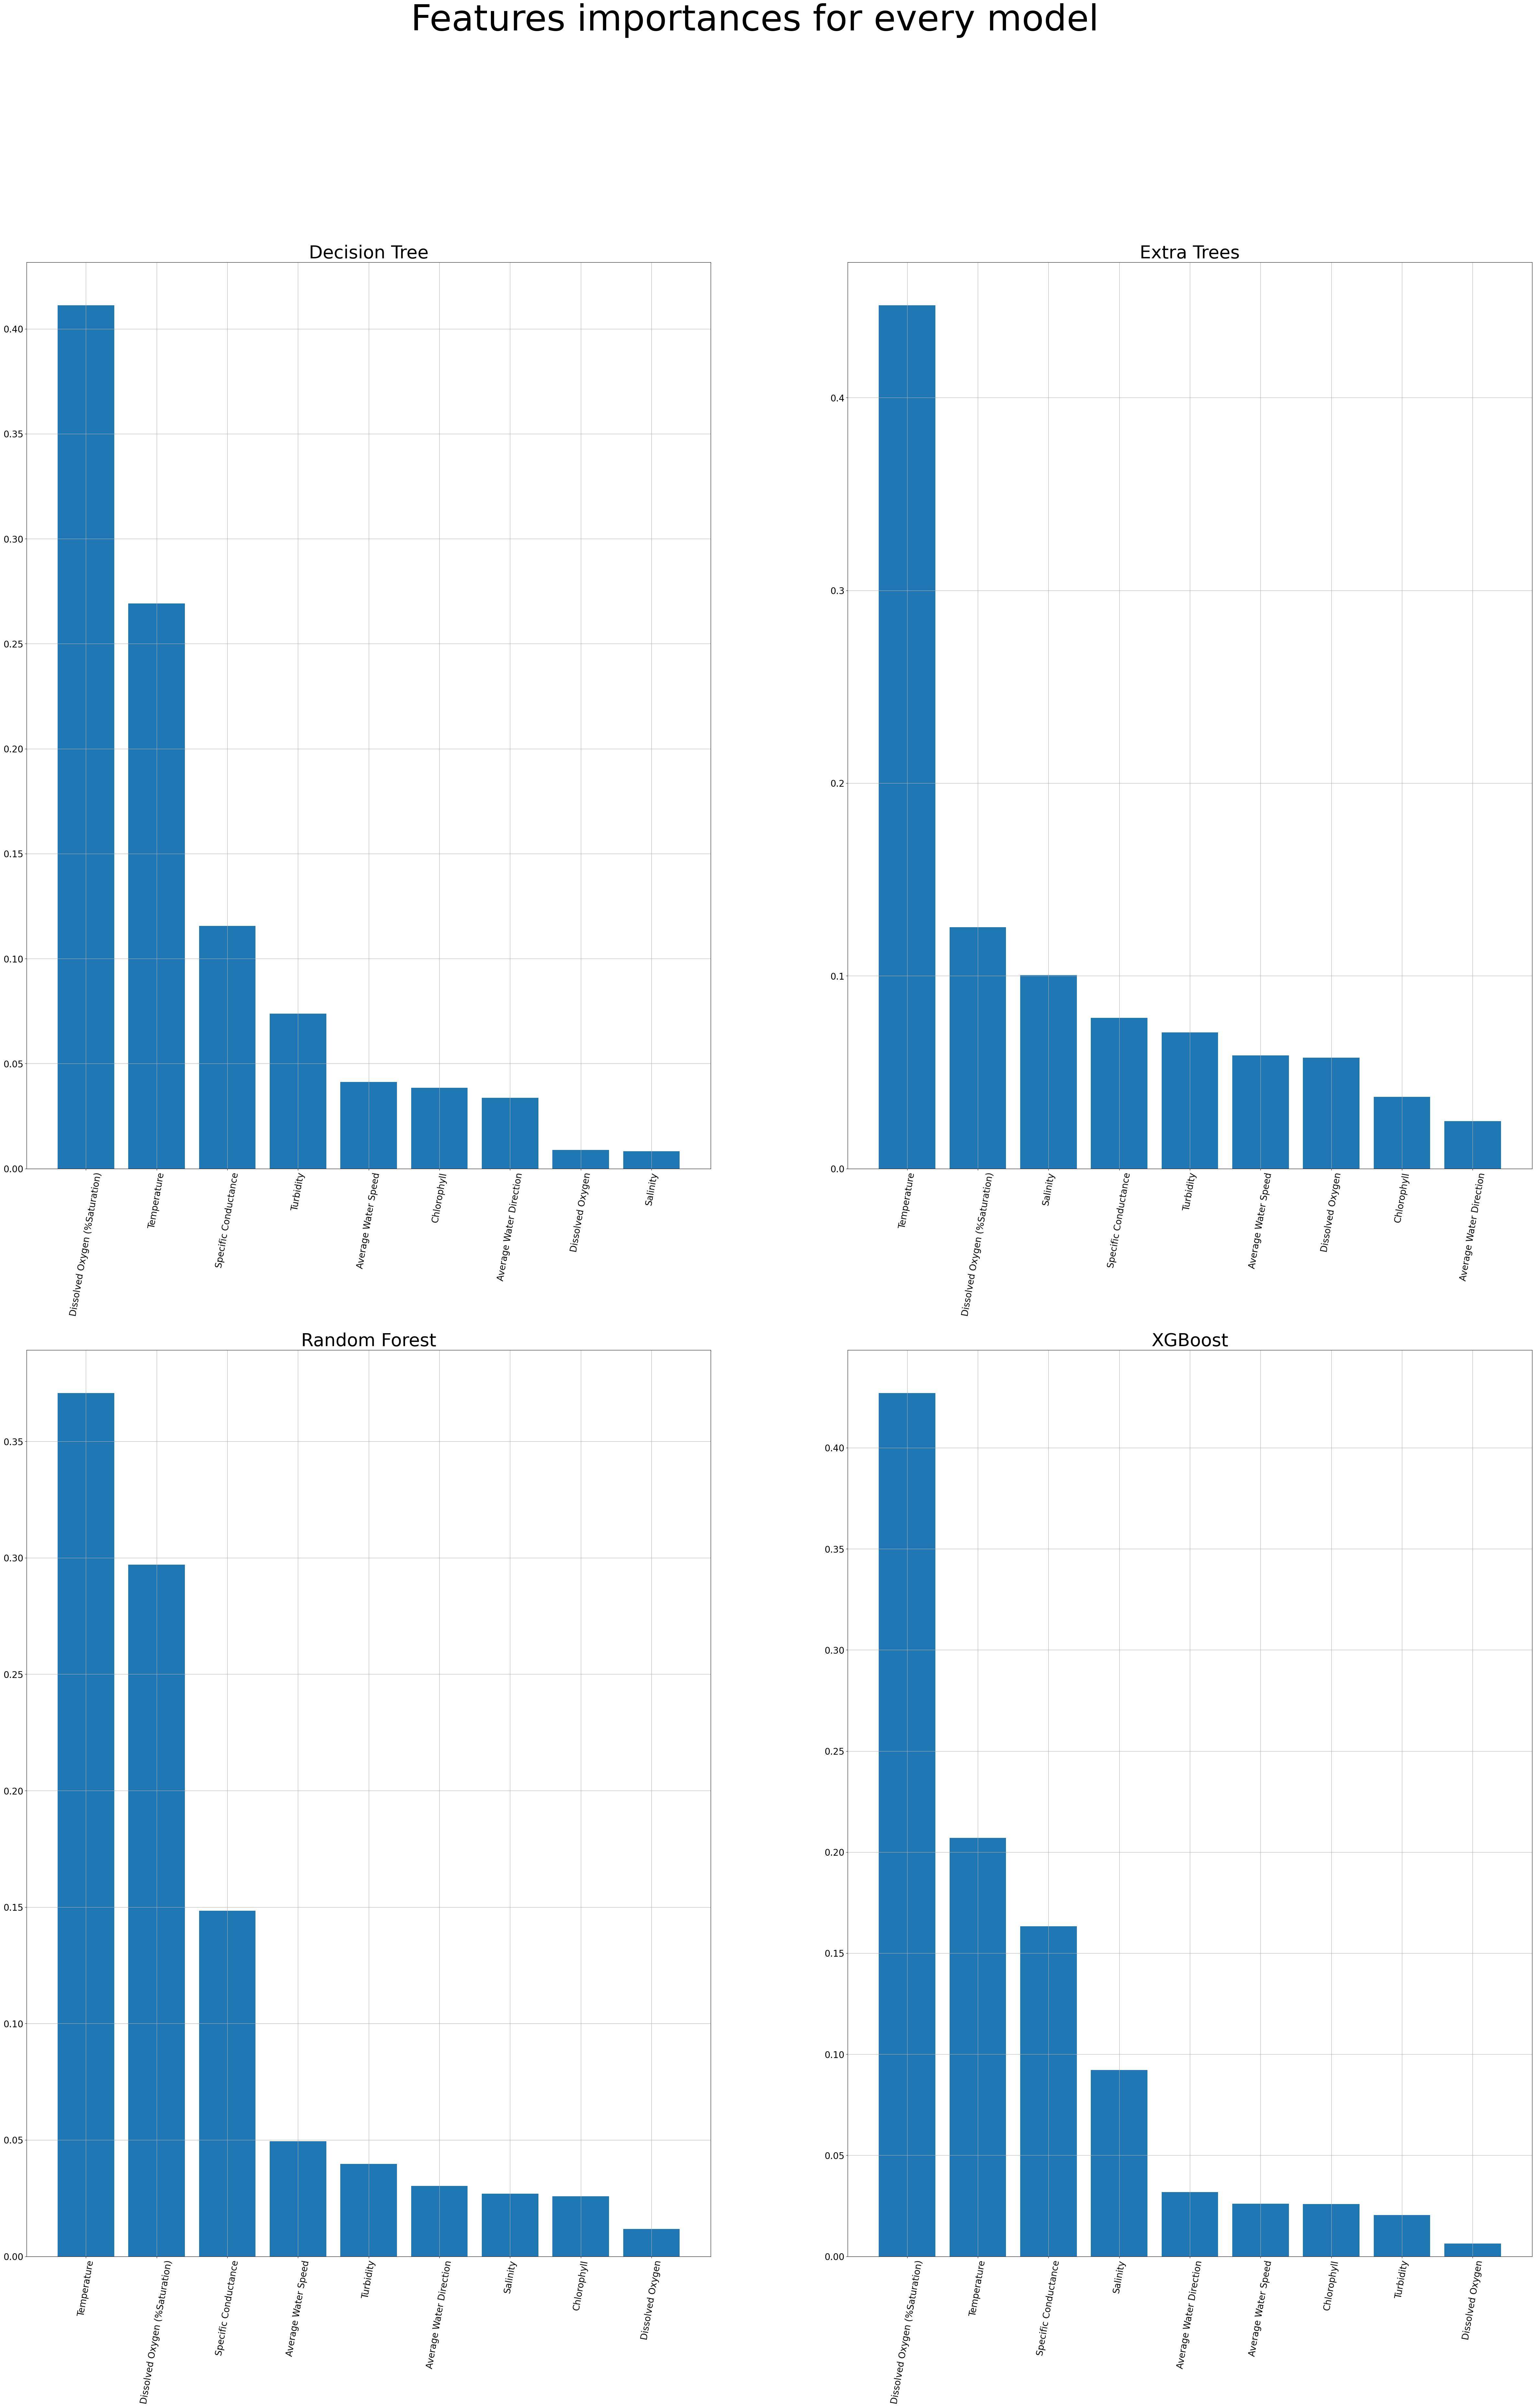

In [36]:
plt.figure(figsize = (60,80))

plt.subplot(221)
plt.bar(range(X_train.shape[1]),importances_dt[indexes_dt]) 
plt.xticks(range(X_train.shape[1]),names_dt,rotation = 80,fontsize = 20) 
plt.yticks(fontsize = 20)
plt.title('Decision Tree',fontsize = 40)
plt.grid()

plt.subplot(222)
plt.bar(range(X_train.shape[1]),importances_et[indexes_et]) 
plt.xticks(range(X_train.shape[1]),names_et,rotation = 80,fontsize = 20) 
plt.title('Extra Trees',fontsize = 40)
plt.yticks(fontsize = 20)
plt.grid()

plt.subplot(223)
plt.bar(range(X_train.shape[1]),importances_rf[indexes_rf]) 
plt.xticks(range(X_train.shape[1]),names_rf,rotation = 80,fontsize = 20) 
plt.title('Random Forest',fontsize = 40)
plt.yticks(fontsize = 20)
plt.grid()

plt.subplot(224)
plt.bar(range(X_train.shape[1]),importances_xgb[indexes_xgb]) 
plt.xticks(range(X_train.shape[1]),names_xgb,rotation = 80,fontsize = 20) 
plt.title('XGBoost',fontsize = 40)
plt.yticks(fontsize = 20)
plt.grid()

plt.suptitle('Features importances for every model',fontsize = 80)
plt.show()